# Import Library

In [1]:
import os
from glob import glob
import pandas as pd
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import cv2
import numpy as np
from numpy import asarray

# Turn on GPU

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Mount to Google Drive

In [3]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [4]:
path = os.path.join("../content/drive/My Drive/Colab Notebooks/Dataset/", "Embrio")

path_image = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join(path,"Embryo","*"))}

path_imagemask = {os.path.splitext(os.path.basename(x))[0]: x
                  for x in glob(os.path.join(path,"EmbryoMask","*"))}

In [5]:
df = pd.read_csv("../content/drive/My Drive/Colab Notebooks/Dataset/Embrio/Embryo.csv")

In [6]:
df.head()

,id,label
0,Amirah_1(atas)-2-1.jpg,train
1,Amirah_1-2.jpg,train
2,Amirah_1-x-1.jpg,train
3,Anggi_1.jpg,train
4,Anggi_1-2-1.jpg,train


In [7]:
for i in range(len(df)):
  df['id'][i] = df['id'][i].replace('.jpg','')

Get Path Image

In [8]:
df['path_image'] = df['id'].map(path_image.get)
df['path_imagemask'] = df['id'].map(path_imagemask.get)

In [9]:
raw_id = []
raw_data = []
label_data = []

for i in range(len(df)):
  imgX = Image.open(df['path_image'][i])
  imgY = Image.open(df['path_imagemask'][i])
  raw_id.append(df['id'][i])
  raw_data.append(imgX)
  label_data.append(imgY)

In [10]:
raw_flip = []
label_flip = []
raw_enhance = []
raw_flip_enhance = []

for i in range(len(raw_data)):
  img = raw_data[i].copy()
  imgEnhance = ImageEnhance.Brightness(img)
  brightness = 1.2
  imgEnhance = imgEnhance.enhance(brightness)
  imgEnhance = ImageEnhance.Contrast(imgEnhance)
  contrast = 2.5
  imgEnhance = imgEnhance.enhance(contrast)
  imgFlip = img.transpose(Image.FLIP_LEFT_RIGHT)
  imgFlipEnhance = imgEnhance.transpose(Image.FLIP_LEFT_RIGHT)
  raw_flip.append(imgFlip)
  raw_enhance.append(imgEnhance)
  raw_flip_enhance.append(imgFlipEnhance)

for i in range(len(label_data)):
  img = label_data[i].copy()
  imgFlip = img.transpose(Image.FLIP_LEFT_RIGHT)
  label_flip.append(imgFlip)

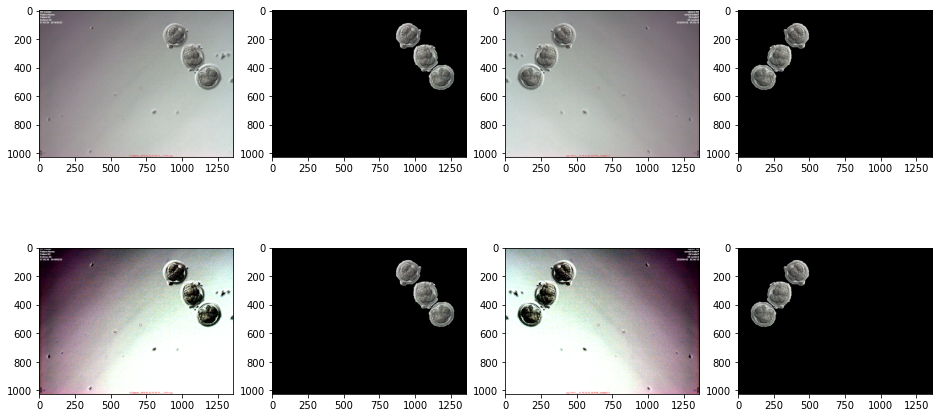

In [11]:
no = 2
n=4
fig_width = n*4
fig_height = n*2
fig, ax = plt.subplots(2, n)
fig. set_figwidth(fig_width)
fig. set_figheight(fig_height)

ax[0,0].imshow(raw_data[no])
ax[0,1].imshow(label_data[no],cmap='gray')
ax[0,2].imshow(raw_flip[no])
ax[0,3].imshow(label_flip[no],cmap='gray')
ax[1,0].imshow(raw_enhance[no])
ax[1,1].imshow(label_data[no],cmap='gray')
ax[1,2].imshow(raw_flip_enhance[no])
ax[1,3].imshow(label_flip[no],cmap='gray')

In [12]:
no = 22
directoryEnhance = "../content/drive/My Drive/Colab Notebooks/Dataset/Embrio/EmbryoEnhance"
directoryFlip = "../content/drive/My Drive/Colab Notebooks/Dataset/Embrio/EmbryoFlip"
directoryFlipEnhance = "../content/drive/My Drive/Colab Notebooks/Dataset/Embrio/EmbryoFlipEnhance"
directoryMask = "../content/drive/My Drive/Colab Notebooks/Dataset/Embrio/EmbryoMaskFlip"
os.makedirs(directoryEnhance, exist_ok=True)
os.makedirs(directoryMask, exist_ok=True)
os.makedirs(directoryFlip, exist_ok=True)
os.makedirs(directoryFlipEnhance, exist_ok=True)

for i in range(len(raw_enhance)):
  raw_enhance[i].save(directoryEnhance + '/' + raw_id[i] + ".jpg") 

for i in range(len(raw_flip)):
  raw_flip[i].save(directoryFlip + '/' + raw_id[i] + ".jpg") 

for i in range(len(label_flip)):
  label_flip[i].save(directoryMask + '/' + raw_id[i] + ".jpg") 

for i in range(len(raw_flip_enhance)):
  raw_flip_enhance[i].save(directoryFlipEnhance + '/' + raw_id[i] + ".jpg") 